**WELCOME TO OUR MACHINE LEARNING PROJECT ON PREDICTING HAPPINESS / QUALITY OF LIFE.**

**IN THIS FIRST SECTION, WE'LL IMPORT OUR DATA, SANITIZE IT, AND GET IT READY FOR ANALYSIS.**



To start, we'll import most of the libraries that we may or may not need to perform our analysis:



In [3]:
# Importing the libraries that will be needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

Then we'll import our dataset, and take a look at it:

In [4]:
# Loading the dataset
balance = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv')
balance.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


A preliminary investigation reveals a few columns that will need to be prepped for our analysis:

- Timestamp is irrevelant for our purposes, and can be dropped altogether.
- Age Range should be cleaned up by converting each range category to a numerical value: Less than 20 = 1, 21 to 35 = 2, 36 to 50 = 3, 51 or more = 4 
- Gender can also be made numerical in the same way, we'll assign 0 = Female, 1 = Male.
- Row 10007 \(index 10005\) contains a date\-formatted entry for the DAILY\_STRESS column.  Since we don't know what that value should actually be, we'll drop the entire row as our sample size is large enough to not be impacted.
- Work\-life balance score is a calculated value, though we don't know how it is calculated.  We'll likely want to extract it so that it doesn't factor into our model's initial training, similar to how the "Region" column was excluded in the Module 4 assignment. We can then use it for testing or training our predictions at a later time.  Similar to Module 4, we'll assign "x" as the dataframe with the variables, and "y" as the dataframe with the actual results. 



In [5]:
# Dropping the Timestamp column
balance = balance.drop(columns=['Timestamp'])

# Replacing Age Ranges in the Age column
balance['AGE'] = balance['AGE'].replace({"Less than 20": 1, "21 to 35": 2, "36 to 50": 3, "51 or more": 4})

# Replacing "Female" with 0 and "Male" with 1 in the Gender column
balance['GENDER'] = balance['GENDER'].replace({"Female": 0, "Male": 1})

# Dropping index row 10005, which contains a non-numeric value
balance = balance.drop(balance.index[10005])

# Assigning x and y as the dataframes for variables and results
x = balance.drop(columns=['WORK_LIFE_BALANCE_SCORE'])
y = balance['WORK_LIFE_BALANCE_SCORE']


# Printing the shape of x and y:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (15971, 22)
Shape of y: (15971,)


The Work\-Life balance score is a calculated field based on the prior entry in that row, but we don't know how that calculation is done.



In [6]:
# Taking a look at x, to confirm everything looks as intended:
x.head()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER
0,3,2,2,5,0,5,2,0,1,6,...,0,7,5,5,1,4,0,5,3,0
1,2,3,4,3,8,10,5,2,2,5,...,5,8,2,2,2,3,2,6,3,0
2,2,3,3,4,4,10,3,2,2,2,...,5,8,10,2,2,4,8,3,3,0
3,3,3,10,3,10,7,2,5,2,3,...,0,5,7,5,1,5,2,0,4,0
4,5,1,3,3,10,4,2,4,2,5,...,0,7,0,0,2,8,1,5,4,0


**IN THE NEXT SECTION, WE'LL APPLY WHAT WE LEARNED ABOUT SVMS FROM THE MODULE 4 ASSIGNMENT OF OUR COURSE TO OUR GROUP PROJECT DATASET.**


Now we will split the data out into Testing and Training sets, still using the strategy from  Assignment 4.1:


In [7]:
# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Printing the shapes of all four arrays
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (11978, 22)
Shape of x_test: (3993, 22)
Shape of y_train: (11978,)
Shape of y_test: (3993,)


We can then standardize them using the Scaler method from Assignment 4.1:


In [8]:
# Creating a StandardScaler object
scaler = StandardScaler()

# Fitting the scaler to the dataframes x_train and x_test
scaler.fit(x_train, x_test)

# Transforming x_train and x_test to apply standardization
x_train_scaled_array = scaler.transform(x_train)
x_test_scaled_array = scaler.transform(x_test)

# Converting the scaled arrays back into dataframes so as to calculate individual means and standard deviations
x_train_scaled = pd.DataFrame(x_train_scaled_array, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled_array, columns=x_test.columns)

# Computing the means and the standard deviations for each column
x_train_column_means = x_train_scaled.mean(axis=0)  
x_train_column_stds = x_train_scaled.std(axis=0)   
x_test_column_means = x_test_scaled.mean(axis=0)  
x_test_column_stds = x_test_scaled.std(axis=0) 

# Printing the means and std devs for each column, rounding to 6 digits
for i, (mean, std) in enumerate(zip(x_train_column_means, x_train_column_stds)):
    print(f"Column {i+1}: Mean = {mean:.6f}, Std Dev = {std:.6f}")

Column 1: Mean = -0.000000, Std Dev = 1.000042
Column 2: Mean = 0.000000, Std Dev = 1.000042
Column 3: Mean = 0.000000, Std Dev = 1.000042
Column 4: Mean = -0.000000, Std Dev = 1.000042
Column 5: Mean = -0.000000, Std Dev = 1.000042
Column 6: Mean = 0.000000, Std Dev = 1.000042
Column 7: Mean = -0.000000, Std Dev = 1.000042
Column 8: Mean = 0.000000, Std Dev = 1.000042
Column 9: Mean = 0.000000, Std Dev = 1.000042
Column 10: Mean = 0.000000, Std Dev = 1.000042
Column 11: Mean = -0.000000, Std Dev = 1.000042
Column 12: Mean = -0.000000, Std Dev = 1.000042
Column 13: Mean = -0.000000, Std Dev = 1.000042
Column 14: Mean = -0.000000, Std Dev = 1.000042
Column 15: Mean = -0.000000, Std Dev = 1.000042
Column 16: Mean = -0.000000, Std Dev = 1.000042
Column 17: Mean = 0.000000, Std Dev = 1.000042
Column 18: Mean = 0.000000, Std Dev = 1.000042
Column 19: Mean = -0.000000, Std Dev = 1.000042
Column 20: Mean = 0.000000, Std Dev = 1.000042
Column 21: Mean = 0.000000, Std Dev = 1.000042
Column 22: 

We have now verified that the means have all been scaled to nearly 0, and the standard deviations have all been scaled to nearly 1.



At this point, we must diverge slightly from the learnings of Assignment 4.1, since our dataset is a regression problem rather than a classification problem.  We can still use the same principles as shown in 4.1, but for this we will first attempt to use a Support Vector Regression rather than a classifier:

In [9]:
# We already have these libraries imported, but for future reference and ease of use copy / pasting we'll import them again: 
from sklearn import svm
from sklearn.metrics import mean_squared_error

# We Used Chat Gpt 4.0 mini on 3/18/25 to identify the SMV regressor:
# Creating an SVM regressor and assigning it to clf1
regressor1 = svm.SVR()

# Fitting the SVM regressor with the training data
regressor1.fit(x_train_scaled, y_train)

# Making predictions on the test data
predictions1 = regressor1.predict(x_test_scaled)

# Testing predictions on the test data using mean squared error
mse = mean_squared_error(y_test, predictions1)

# Printing out the results of our prediction
print(mse)

71.81477735555184


That seems pretty decent... but let's visualize it to see what we're really dealing with.

Text(0.5, 1.0, 'Predicted vs. Actual Values')

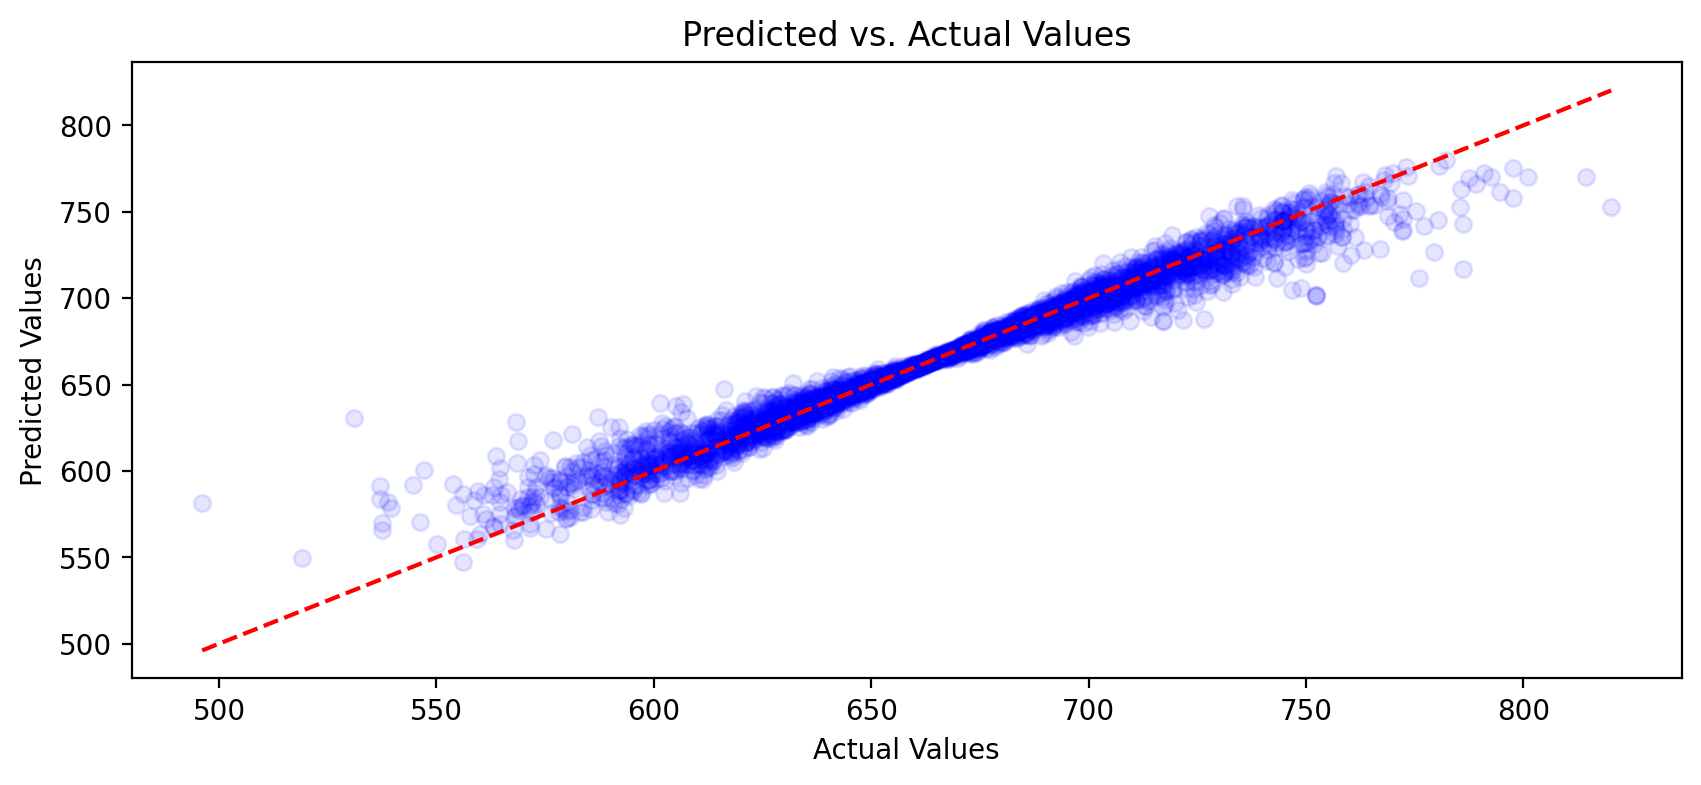

In [10]:
# Setting up a scatter plot. The perfect prediction line represents the ground truth of y_test
plt.figure(figsize=(10, 4))
plt.scatter(y_test, predictions1, color='blue', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

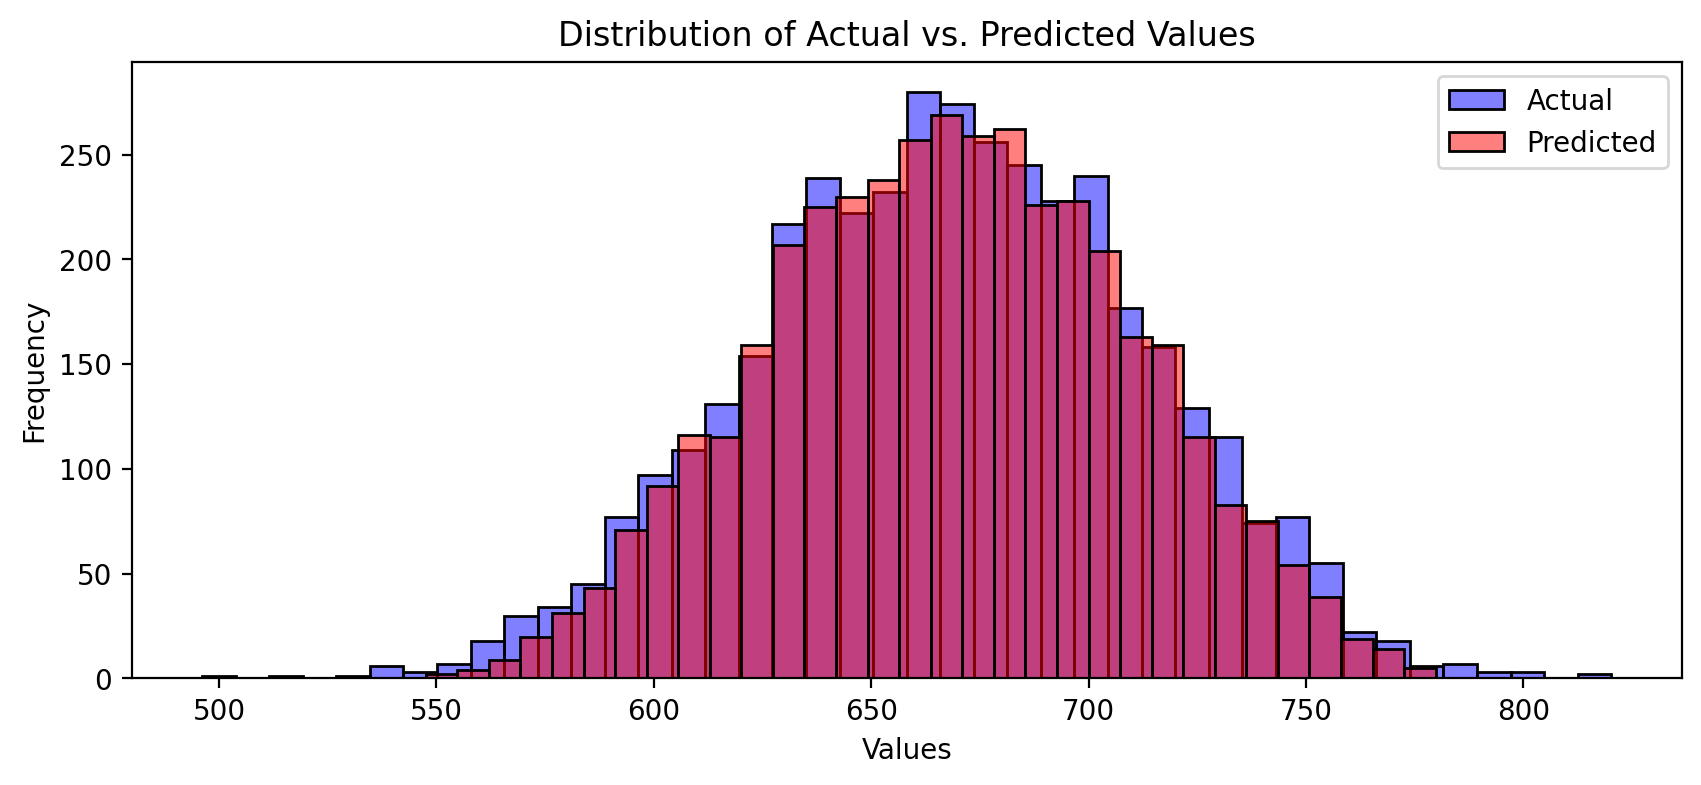

In [11]:
# Also mapping out a histogram, to better visualize actual vs predicted:
plt.figure(figsize=(10, 4))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual')
sns.histplot(predictions1, color='red', alpha=0.5, label='Predicted',)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()

Okay, not too shabby!  Per the scatter plot, the predictions around the mean seem more accurate than the predictions that deviate from it. That said, the histogram shows Gaussian distributions that are pretty close for predictions vs. ground truth.

That said, this still isn't close enough for us to make high\-confidence, high\-precision predictions.

For that, it's time to use a different approach and train a neural network...


**IN THIS THIRD SECTION, WE WILL TRAIN A MODEL ON THE DATA USING THE YOUTUBE VIDEO FROM DEEPLIZARD THAT WAS INCLUDED IN THE MODULE 5 REQUIRED READINGS.**


In [12]:
#Importing the necessary Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

2025-04-05 06:46:39.130979: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-05 06:46:39.132887: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 06:46:39.167401: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-05 06:46:39.168081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2025-04-05 06:46:40.254468: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
# Creating a sequential model with 22 dimensions (columns) in input_shape, two hidden layers with 16 and 32 neurons respectively, and an output layer with 1 units

model = Sequential([
    Dense(16, input_shape=(22, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

In [14]:
# Compiling the model, using Adam as the optimizer with a low learning rate (lr) of.0001, and a loss function of mean_squared_error since its a regression.  We won't print out the result of mean_absolute error used in the youtube video with (metrics=['mean_absolute_error'])

model.compile(Adam(learning_rate=.0001), loss='mean_squared_error')

In [15]:
# Training the model by calling fit. "Batch_size" is how many pieces of data we want sent to the model at once, epochs=X is how many times the data should run through the model. Shuffle=True shuffles the data each time it runs through an epoch, verbose=2 determines how much output we want to see.

# Just for fun and to have a solid baseline against which to track our improvement, we'll run our model for a single epoch to start:

model.fit(x_train_scaled, y_train, batch_size=10, epochs=1, shuffle=True, verbose=2)

1198/1198 - 2s - loss: 442168.4688 - 2s/epoch - 2ms/step


  1/125 [..............................] - ETA: 9s

 40/125 [========>.....................] - ETA: 0s

108/125 [========================>.....] - ETA: 0s

125/125 [==============================] - 0s 925us/step


Text(0.5, 1.0, 'Predicted vs. Actual Values')

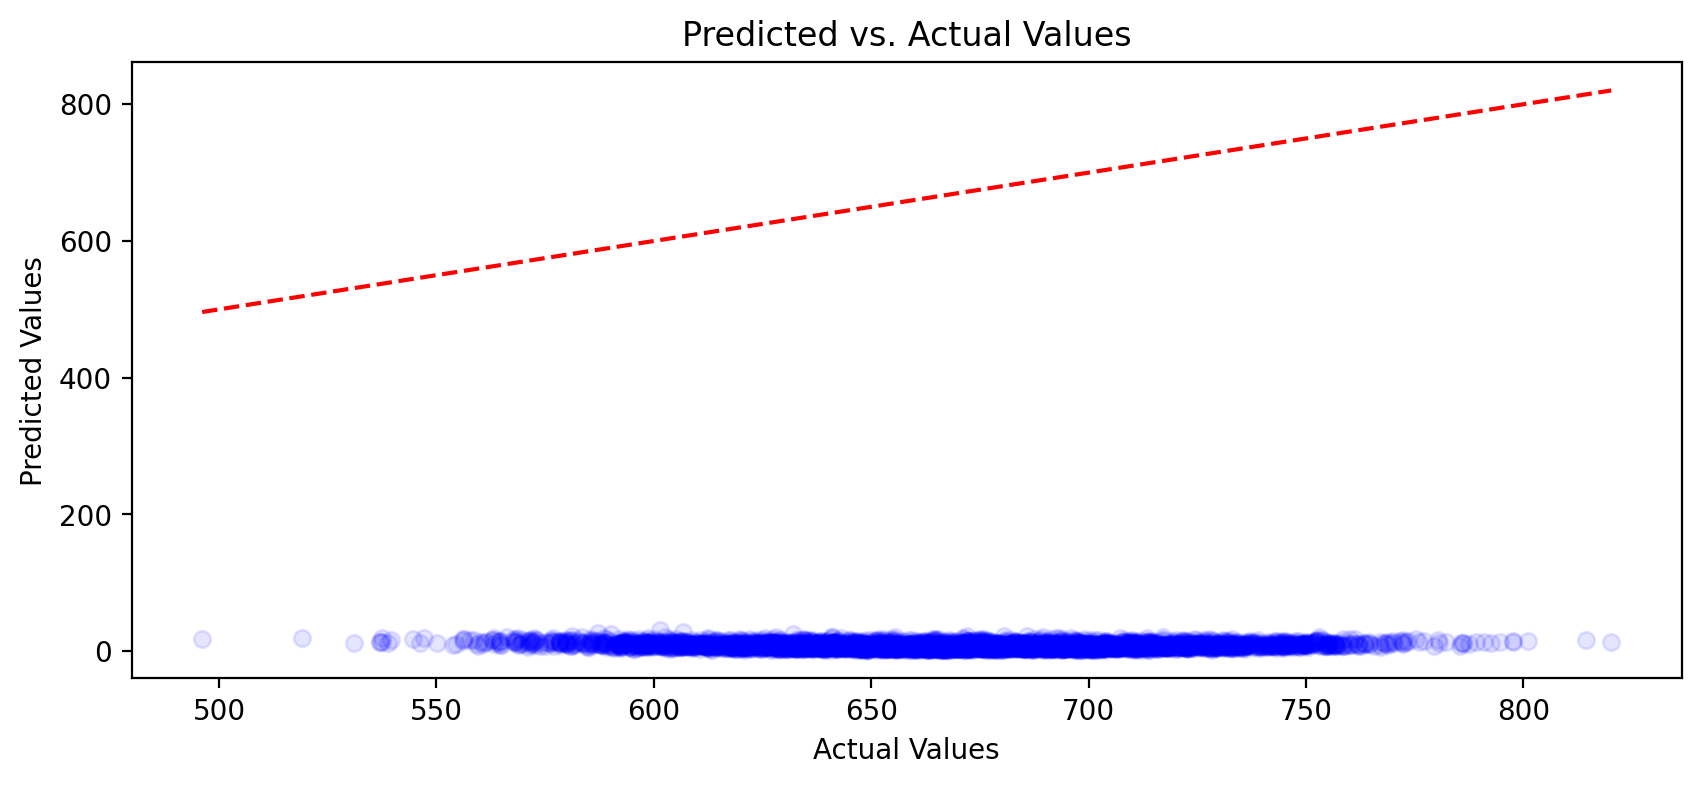

In [16]:
# Creating predictions_2 so we can call it to visualize results
predictions_2 = model.predict(x_test_scaled)

# Setting up a scatter plot. The perfect prediction line represents the ground truth of y_test
plt.figure(figsize=(10, 4))
plt.scatter(y_test, predictions_2, color='blue', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

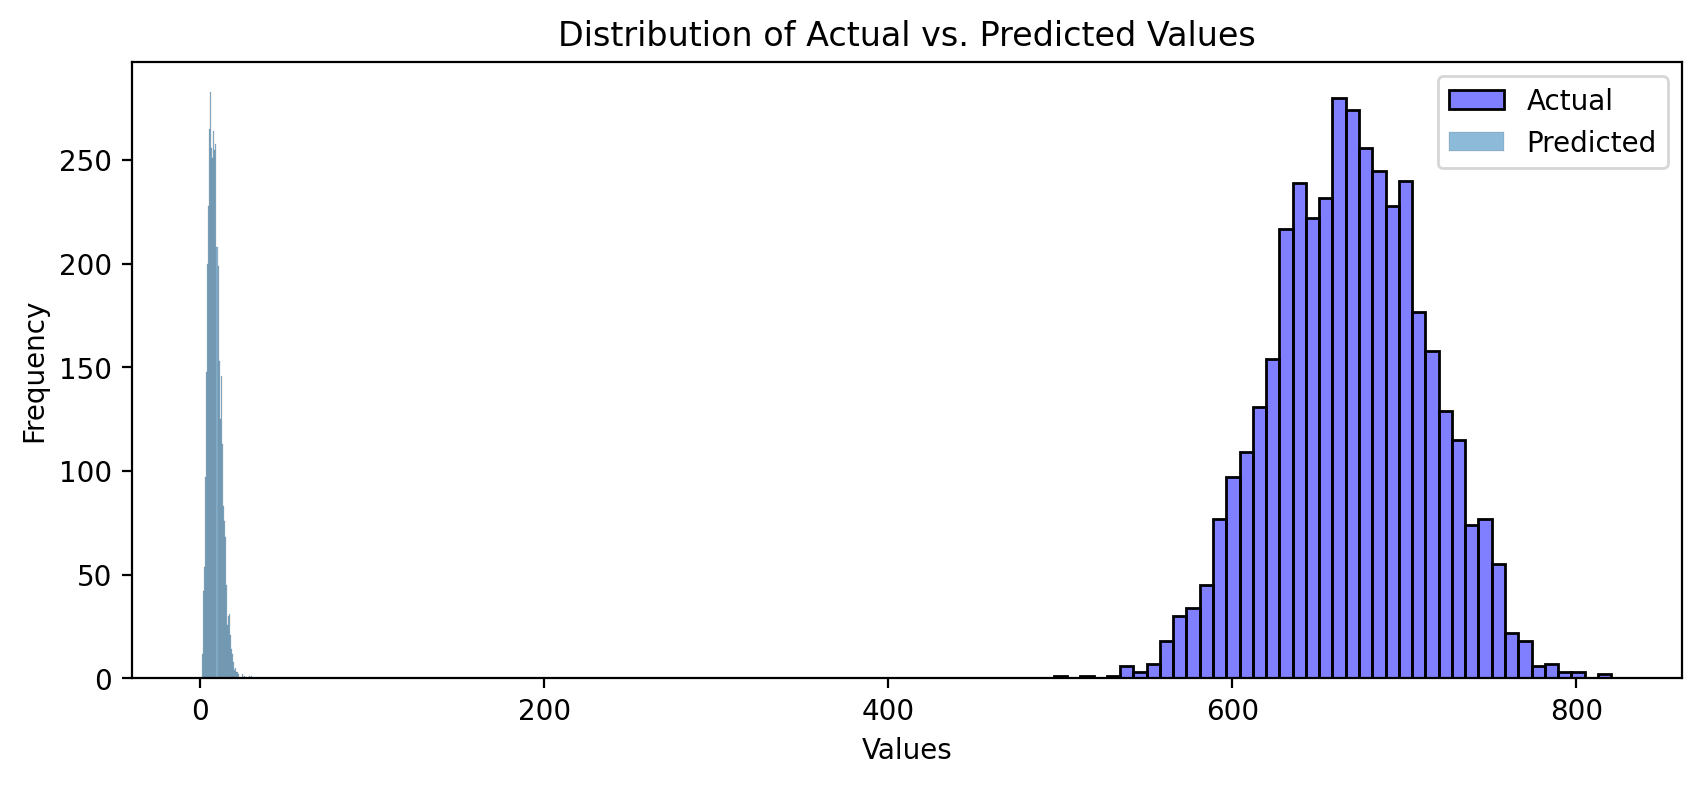

In [17]:
# Also mapping out a histogram, to better visualize actual vs predicted:
plt.figure(figsize=(10, 4))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual')
sns.histplot(predictions_2, color='red', alpha=0.5, label='Predicted',)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()

Okay, so that's properly abysmal baseline!  

Our predictions do not match the ground truth in any way.

But we're just getting started, and this is only a baseline.

For our next step, we'll run our model for an additional 19 epochs, so that our output matches the template of 20 total epochs run by deeplizard.


In [18]:
# Now running 19 more epochs to visualize how it progresses
model.fit(x_train_scaled, y_train, batch_size=10, epochs=19, shuffle=True, verbose=2)

Epoch 1/19


1198/1198 - 2s - loss: 414640.1250 - 2s/epoch - 1ms/step


Epoch 2/19


1198/1198 - 2s - loss: 340997.3750 - 2s/epoch - 1ms/step


Epoch 3/19


1198/1198 - 2s - loss: 234296.7812 - 2s/epoch - 1ms/step


Epoch 4/19


1198/1198 - 2s - loss: 136292.5625 - 2s/epoch - 1ms/step


Epoch 5/19


1198/1198 - 2s - loss: 78041.0391 - 2s/epoch - 2ms/step


Epoch 6/19


1198/1198 - 2s - loss: 54069.7109 - 2s/epoch - 1ms/step


Epoch 7/19


1198/1198 - 2s - loss: 41996.5664 - 2s/epoch - 1ms/step


Epoch 8/19


1198/1198 - 2s - loss: 32457.5137 - 2s/epoch - 1ms/step


Epoch 9/19


1198/1198 - 2s - loss: 24557.3398 - 2s/epoch - 1ms/step


Epoch 10/19


1198/1198 - 2s - loss: 18287.9688 - 2s/epoch - 1ms/step


Epoch 11/19


1198/1198 - 2s - loss: 13526.4307 - 2s/epoch - 2ms/step


Epoch 12/19


1198/1198 - 2s - loss: 10050.9492 - 2s/epoch - 1ms/step


Epoch 13/19


1198/1198 - 2s - loss: 7600.2900 - 2s/epoch - 1ms/step


Epoch 14/19


1198/1198 - 2s - loss: 5903.2065 - 2s/epoch - 1ms/step


Epoch 15/19


1198/1198 - 2s - loss: 4726.6875 - 2s/epoch - 1ms/step


Epoch 16/19


1198/1198 - 2s - loss: 3898.9812 - 2s/epoch - 1ms/step


Epoch 17/19


1198/1198 - 2s - loss: 3294.1643 - 2s/epoch - 1ms/step


Epoch 18/19


1198/1198 - 2s - loss: 2831.9136 - 2s/epoch - 1ms/step


Epoch 19/19


1198/1198 - 2s - loss: 2468.9485 - 2s/epoch - 1ms/step


That's a much improved MSE!  

It's still much worse than our SVM result, but we're far from done here.

Before we go any further, let's visualize our updated results:


  1/125 [..............................] - ETA: 4s

 60/125 [=============>................] - ETA: 0s

 90/125 [====================>.........] - ETA: 0s

125/125 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Predicted vs. Actual Values')

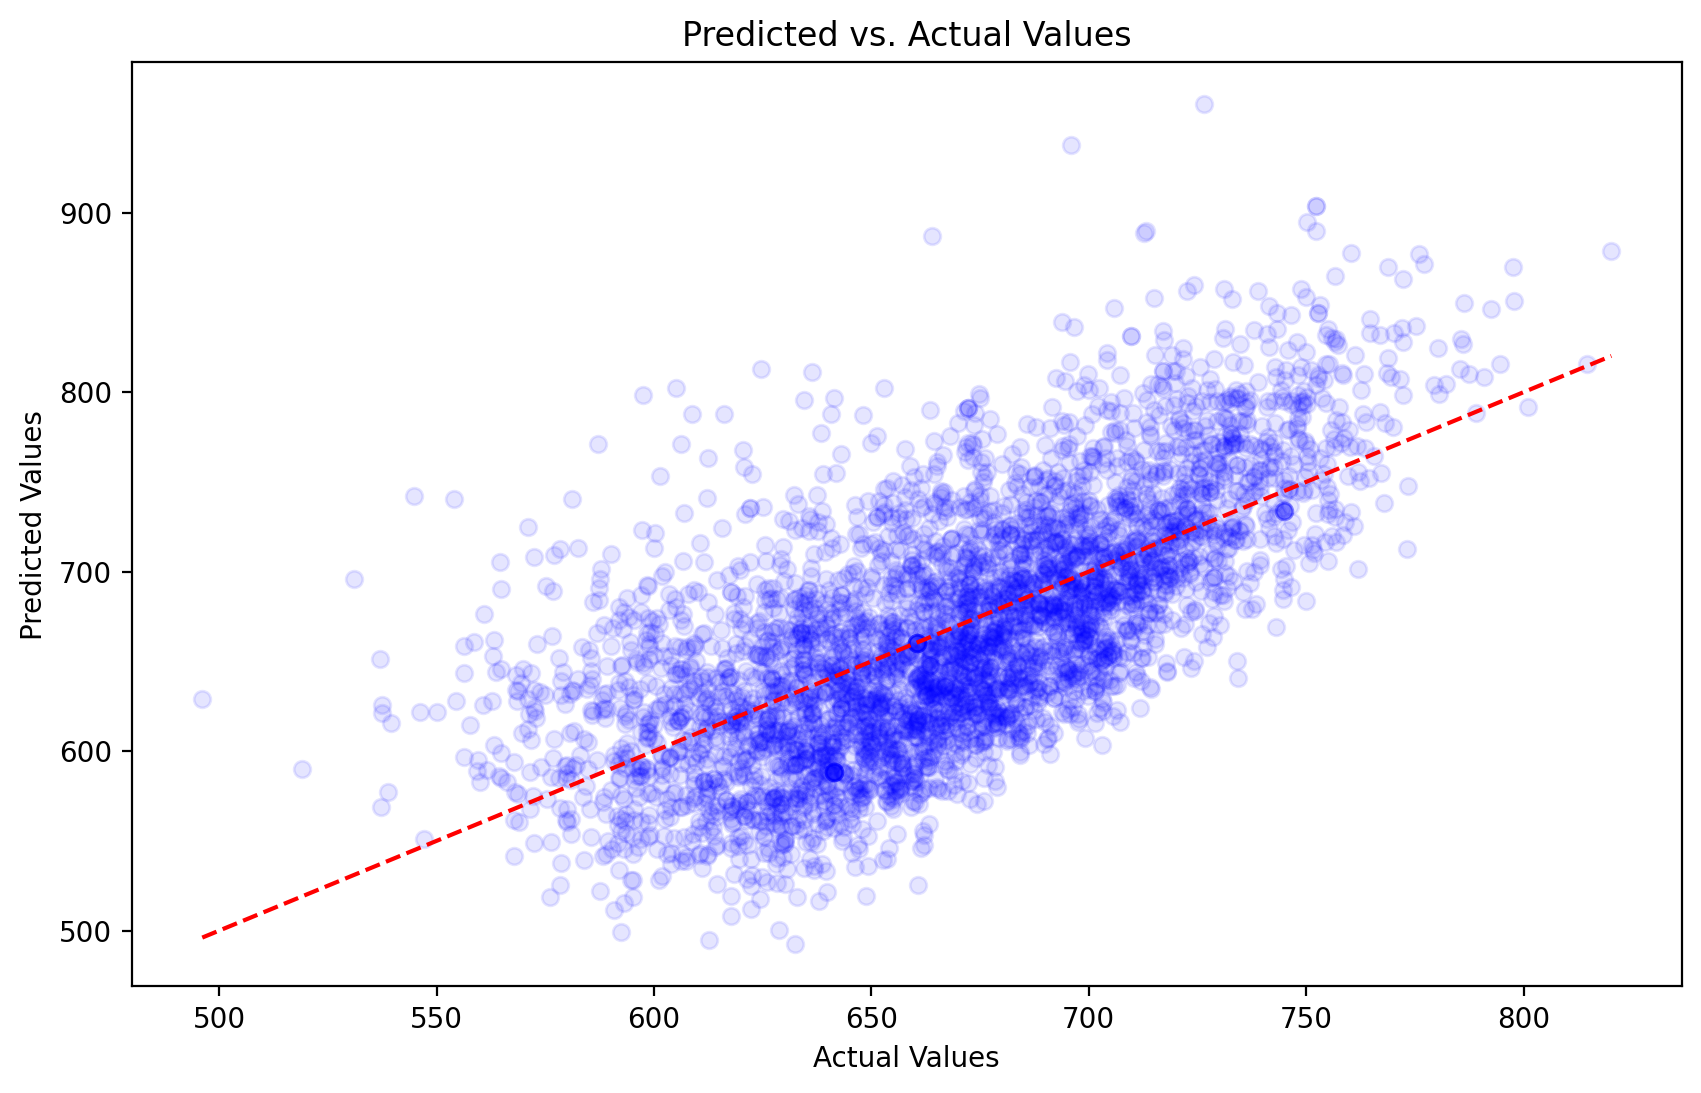

In [19]:
# Creating predictions_3 so we can call it to visualize results
predictions_3 = model.predict(x_test_scaled)

# Setting up a scatter plot. The perfect prediction line represents the ground truth of y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_3, color='blue', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

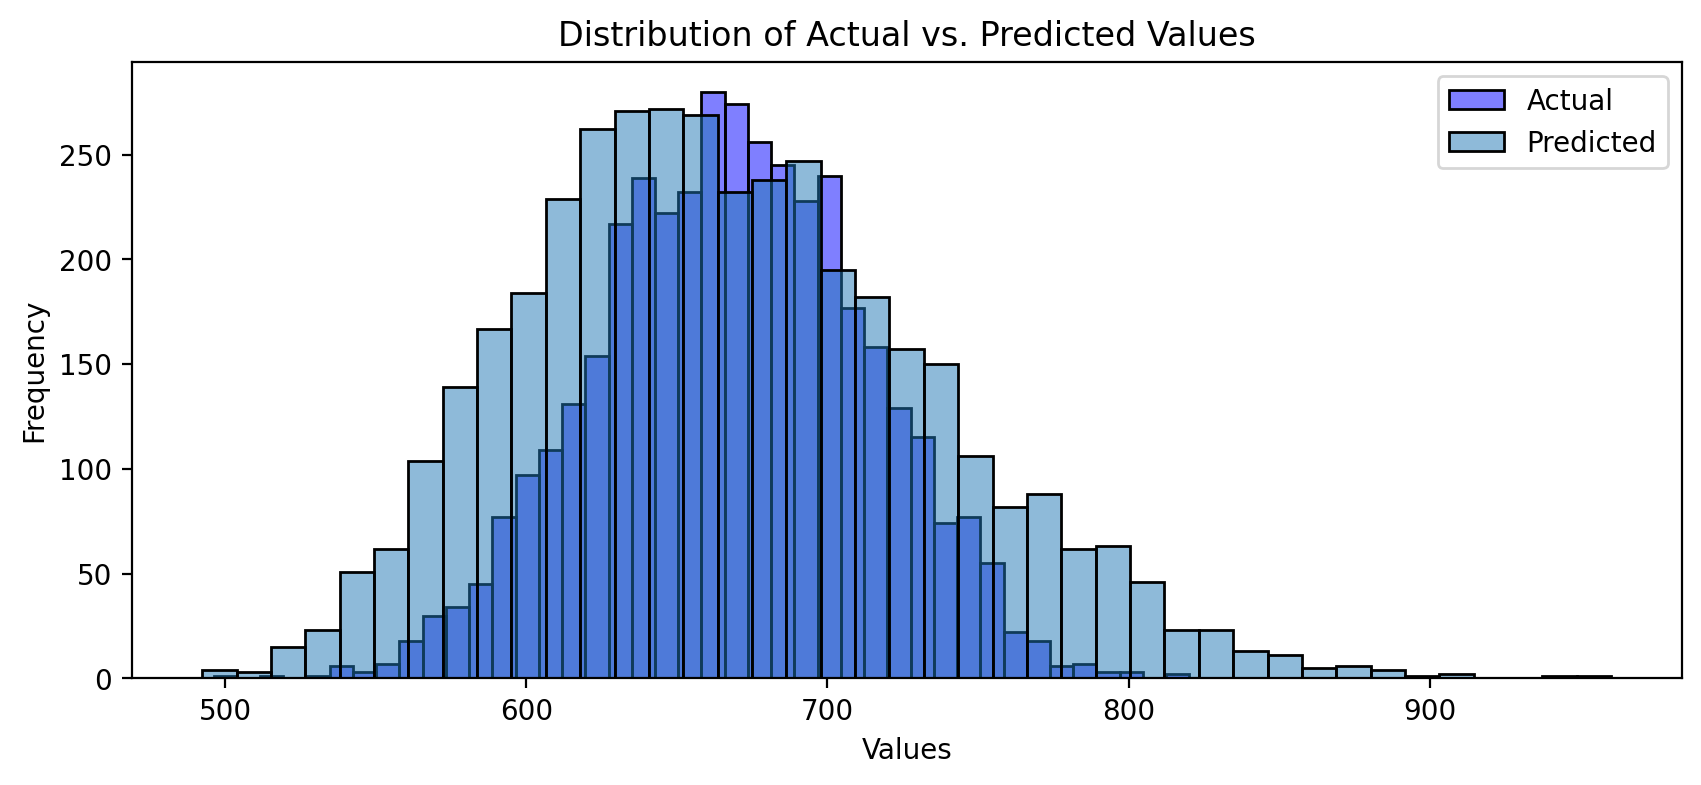

In [20]:
# Also mapping out a histogram, to better visualize actual vs predicted:
plt.figure(figsize=(10, 4))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual')
sns.histplot(predictions_3, color='red', alpha=0.5, label='Predicted',)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()

Our predictions are still far from accurate, but they do overlap significantly with the ground truth.

At this point, looking at the scatterplot and trying to analyze the risk of over\-fitting, we realized an interesting possibility:

Even though we don't know the formula used to create the work\-life balance score, it is likely to be a weighted aggregate of the previous cells \- which would thus likely be a linear function.  

If that were true, it might be impossible to over\-fit: even though this is a regression problem, a full convergence could be possible in which the model learns and converges on the actual formula used. 

All that might be needed for this could be to run enough epochs until the mean squared errors reaches zero, and stays there.

Alright then, time to run though some additional epochs!



In [21]:
# Running 100 additional epochs, but also saving the history so that we can then plot it out to identify if we are overfitting (which would show through the Loss / MSE increasing after the initial decrease) 
history = model.fit(x_train_scaled, y_train, batch_size=10, epochs=100, shuffle=True, verbose=2)

Epoch 1/100


1198/1198 - 2s - loss: 2169.1433 - 2s/epoch - 2ms/step


Epoch 2/100


1198/1198 - 2s - loss: 1915.6742 - 2s/epoch - 1ms/step


Epoch 3/100


1198/1198 - 2s - loss: 1699.0895 - 2s/epoch - 1ms/step


Epoch 4/100


1198/1198 - 2s - loss: 1513.3890 - 2s/epoch - 1ms/step


Epoch 5/100


1198/1198 - 2s - loss: 1347.9111 - 2s/epoch - 2ms/step


Epoch 6/100


1198/1198 - 2s - loss: 1202.5902 - 2s/epoch - 1ms/step


Epoch 7/100


1198/1198 - 2s - loss: 1073.8839 - 2s/epoch - 1ms/step


Epoch 8/100


1198/1198 - 2s - loss: 959.1694 - 2s/epoch - 1ms/step


Epoch 9/100


1198/1198 - 2s - loss: 856.2272 - 2s/epoch - 1ms/step


Epoch 10/100


1198/1198 - 2s - loss: 764.2762 - 2s/epoch - 1ms/step


Epoch 11/100


1198/1198 - 2s - loss: 683.5273 - 2s/epoch - 1ms/step


Epoch 12/100


1198/1198 - 2s - loss: 609.7476 - 2s/epoch - 1ms/step


Epoch 13/100


1198/1198 - 2s - loss: 543.5983 - 2s/epoch - 1ms/step


Epoch 14/100


1198/1198 - 2s - loss: 484.4596 - 2s/epoch - 1ms/step


Epoch 15/100


1198/1198 - 2s - loss: 430.3036 - 2s/epoch - 1ms/step


Epoch 16/100


1198/1198 - 2s - loss: 382.4447 - 2s/epoch - 1ms/step


Epoch 17/100


1198/1198 - 2s - loss: 339.0112 - 2s/epoch - 1ms/step


Epoch 18/100


1198/1198 - 2s - loss: 300.7935 - 2s/epoch - 1ms/step


Epoch 19/100


1198/1198 - 2s - loss: 266.3134 - 2s/epoch - 1ms/step


Epoch 20/100


1198/1198 - 2s - loss: 235.0921 - 2s/epoch - 1ms/step


Epoch 21/100


1198/1198 - 2s - loss: 207.6911 - 2s/epoch - 1ms/step


Epoch 22/100


1198/1198 - 2s - loss: 182.8186 - 2s/epoch - 1ms/step


Epoch 23/100


1198/1198 - 2s - loss: 161.3442 - 2s/epoch - 1ms/step


Epoch 24/100


1198/1198 - 2s - loss: 141.6785 - 2s/epoch - 1ms/step


Epoch 25/100


1198/1198 - 2s - loss: 124.0121 - 2s/epoch - 1ms/step


Epoch 26/100


1198/1198 - 2s - loss: 108.4946 - 2s/epoch - 1ms/step


Epoch 27/100


1198/1198 - 2s - loss: 94.8214 - 2s/epoch - 2ms/step


Epoch 28/100


1198/1198 - 2s - loss: 82.6404 - 2s/epoch - 2ms/step


Epoch 29/100


1198/1198 - 2s - loss: 71.9233 - 2s/epoch - 1ms/step


Epoch 30/100


1198/1198 - 2s - loss: 62.4879 - 2s/epoch - 1ms/step


Epoch 31/100


1198/1198 - 2s - loss: 54.1128 - 2s/epoch - 1ms/step


Epoch 32/100


1198/1198 - 2s - loss: 46.7653 - 2s/epoch - 1ms/step


Epoch 33/100


1198/1198 - 2s - loss: 40.2732 - 2s/epoch - 1ms/step


Epoch 34/100


1198/1198 - 2s - loss: 34.7699 - 2s/epoch - 1ms/step


Epoch 35/100


1198/1198 - 2s - loss: 29.7502 - 2s/epoch - 1ms/step


Epoch 36/100


1198/1198 - 2s - loss: 25.3742 - 2s/epoch - 1ms/step


Epoch 37/100


1198/1198 - 2s - loss: 21.7069 - 2s/epoch - 1ms/step


Epoch 38/100


1198/1198 - 2s - loss: 18.5107 - 2s/epoch - 1ms/step


Epoch 39/100


1198/1198 - 2s - loss: 15.7667 - 2s/epoch - 1ms/step


Epoch 40/100


1198/1198 - 2s - loss: 13.3507 - 2s/epoch - 1ms/step


Epoch 41/100


1198/1198 - 2s - loss: 11.3698 - 2s/epoch - 2ms/step


Epoch 42/100


1198/1198 - 2s - loss: 9.5646 - 2s/epoch - 1ms/step


Epoch 43/100


1198/1198 - 2s - loss: 8.1073 - 2s/epoch - 1ms/step


Epoch 44/100


1198/1198 - 2s - loss: 6.8540 - 2s/epoch - 1ms/step


Epoch 45/100


1198/1198 - 2s - loss: 5.8359 - 2s/epoch - 1ms/step


Epoch 46/100


1198/1198 - 2s - loss: 4.9375 - 2s/epoch - 1ms/step


Epoch 47/100


1198/1198 - 2s - loss: 4.1727 - 2s/epoch - 1ms/step


Epoch 48/100


1198/1198 - 2s - loss: 3.5447 - 2s/epoch - 1ms/step


Epoch 49/100


1198/1198 - 2s - loss: 3.0061 - 2s/epoch - 1ms/step


Epoch 50/100


1198/1198 - 2s - loss: 2.5791 - 2s/epoch - 1ms/step


Epoch 51/100


1198/1198 - 2s - loss: 2.1919 - 2s/epoch - 1ms/step


Epoch 52/100


1198/1198 - 2s - loss: 1.8868 - 2s/epoch - 1ms/step


Epoch 53/100


1198/1198 - 2s - loss: 1.6301 - 2s/epoch - 1ms/step


Epoch 54/100


1198/1198 - 2s - loss: 1.3740 - 2s/epoch - 2ms/step


Epoch 55/100


1198/1198 - 2s - loss: 1.1968 - 2s/epoch - 1ms/step


Epoch 56/100


1198/1198 - 2s - loss: 1.0349 - 2s/epoch - 1ms/step


Epoch 57/100


1198/1198 - 2s - loss: 0.8913 - 2s/epoch - 1ms/step


Epoch 58/100


1198/1198 - 2s - loss: 0.7693 - 2s/epoch - 1ms/step


Epoch 59/100


1198/1198 - 2s - loss: 0.6519 - 2s/epoch - 1ms/step


Epoch 60/100


1198/1198 - 2s - loss: 0.5704 - 2s/epoch - 1ms/step


Epoch 61/100


1198/1198 - 2s - loss: 0.5034 - 2s/epoch - 1ms/step


Epoch 62/100


1198/1198 - 2s - loss: 0.4280 - 2s/epoch - 1ms/step


Epoch 63/100


1198/1198 - 2s - loss: 0.3749 - 2s/epoch - 1ms/step


Epoch 64/100


1198/1198 - 2s - loss: 0.3310 - 2s/epoch - 1ms/step


Epoch 65/100


1198/1198 - 2s - loss: 0.2816 - 2s/epoch - 1ms/step


Epoch 66/100


1198/1198 - 2s - loss: 0.2432 - 2s/epoch - 2ms/step


Epoch 67/100


1198/1198 - 2s - loss: 0.2113 - 2s/epoch - 1ms/step


Epoch 68/100


1198/1198 - 2s - loss: 0.1835 - 2s/epoch - 1ms/step


Epoch 69/100


1198/1198 - 2s - loss: 0.1602 - 2s/epoch - 1ms/step


Epoch 70/100


1198/1198 - 2s - loss: 0.1379 - 2s/epoch - 1ms/step


Epoch 71/100


1198/1198 - 2s - loss: 0.1169 - 2s/epoch - 1ms/step


Epoch 72/100


1198/1198 - 2s - loss: 0.1019 - 2s/epoch - 1ms/step


Epoch 73/100


1198/1198 - 2s - loss: 0.0894 - 2s/epoch - 1ms/step


Epoch 74/100


1198/1198 - 2s - loss: 0.0770 - 2s/epoch - 1ms/step


Epoch 75/100


1198/1198 - 2s - loss: 0.0708 - 2s/epoch - 1ms/step


Epoch 76/100


1198/1198 - 2s - loss: 0.0581 - 2s/epoch - 1ms/step


Epoch 77/100


1198/1198 - 2s - loss: 0.0479 - 2s/epoch - 1ms/step


Epoch 78/100


1198/1198 - 2s - loss: 0.0479 - 2s/epoch - 1ms/step


Epoch 79/100


1198/1198 - 2s - loss: 0.0401 - 2s/epoch - 1ms/step


Epoch 80/100


1198/1198 - 2s - loss: 0.0369 - 2s/epoch - 1ms/step


Epoch 81/100


1198/1198 - 2s - loss: 0.0314 - 2s/epoch - 2ms/step


Epoch 82/100


1198/1198 - 2s - loss: 0.0277 - 2s/epoch - 1ms/step


Epoch 83/100


1198/1198 - 2s - loss: 0.0239 - 2s/epoch - 2ms/step


Epoch 84/100


1198/1198 - 2s - loss: 0.0251 - 2s/epoch - 1ms/step


Epoch 85/100


1198/1198 - 2s - loss: 0.0198 - 2s/epoch - 2ms/step


Epoch 86/100


1198/1198 - 2s - loss: 0.0177 - 2s/epoch - 1ms/step


Epoch 87/100


1198/1198 - 2s - loss: 0.0161 - 2s/epoch - 1ms/step


Epoch 88/100


1198/1198 - 2s - loss: 0.0136 - 2s/epoch - 1ms/step


Epoch 89/100


1198/1198 - 2s - loss: 0.0144 - 2s/epoch - 2ms/step


Epoch 90/100


1198/1198 - 2s - loss: 0.0135 - 2s/epoch - 1ms/step


Epoch 91/100


1198/1198 - 2s - loss: 0.0112 - 2s/epoch - 1ms/step


Epoch 92/100


1198/1198 - 2s - loss: 0.0122 - 2s/epoch - 2ms/step


Epoch 93/100


1198/1198 - 2s - loss: 0.0085 - 2s/epoch - 1ms/step


Epoch 94/100


1198/1198 - 2s - loss: 0.0139 - 2s/epoch - 1ms/step


Epoch 95/100


1198/1198 - 2s - loss: 0.0134 - 2s/epoch - 1ms/step


Epoch 96/100


1198/1198 - 2s - loss: 0.0082 - 2s/epoch - 1ms/step


Epoch 97/100


1198/1198 - 2s - loss: 0.0075 - 2s/epoch - 1ms/step


Epoch 98/100


1198/1198 - 2s - loss: 0.0089 - 2s/epoch - 1ms/step


Epoch 99/100


1198/1198 - 2s - loss: 0.0087 - 2s/epoch - 2ms/step


Epoch 100/100


1198/1198 - 2s - loss: 0.0073 - 2s/epoch - 1ms/step


Now, running the scatterplot again should show simply a straight line:


  1/125 [..............................] - ETA: 6s

 37/125 [=======>......................] - ETA: 0s

 62/125 [=============>................] - ETA: 0s

121/125 [============================>.] - ETA: 0s

125/125 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Predicted vs. Actual Values')

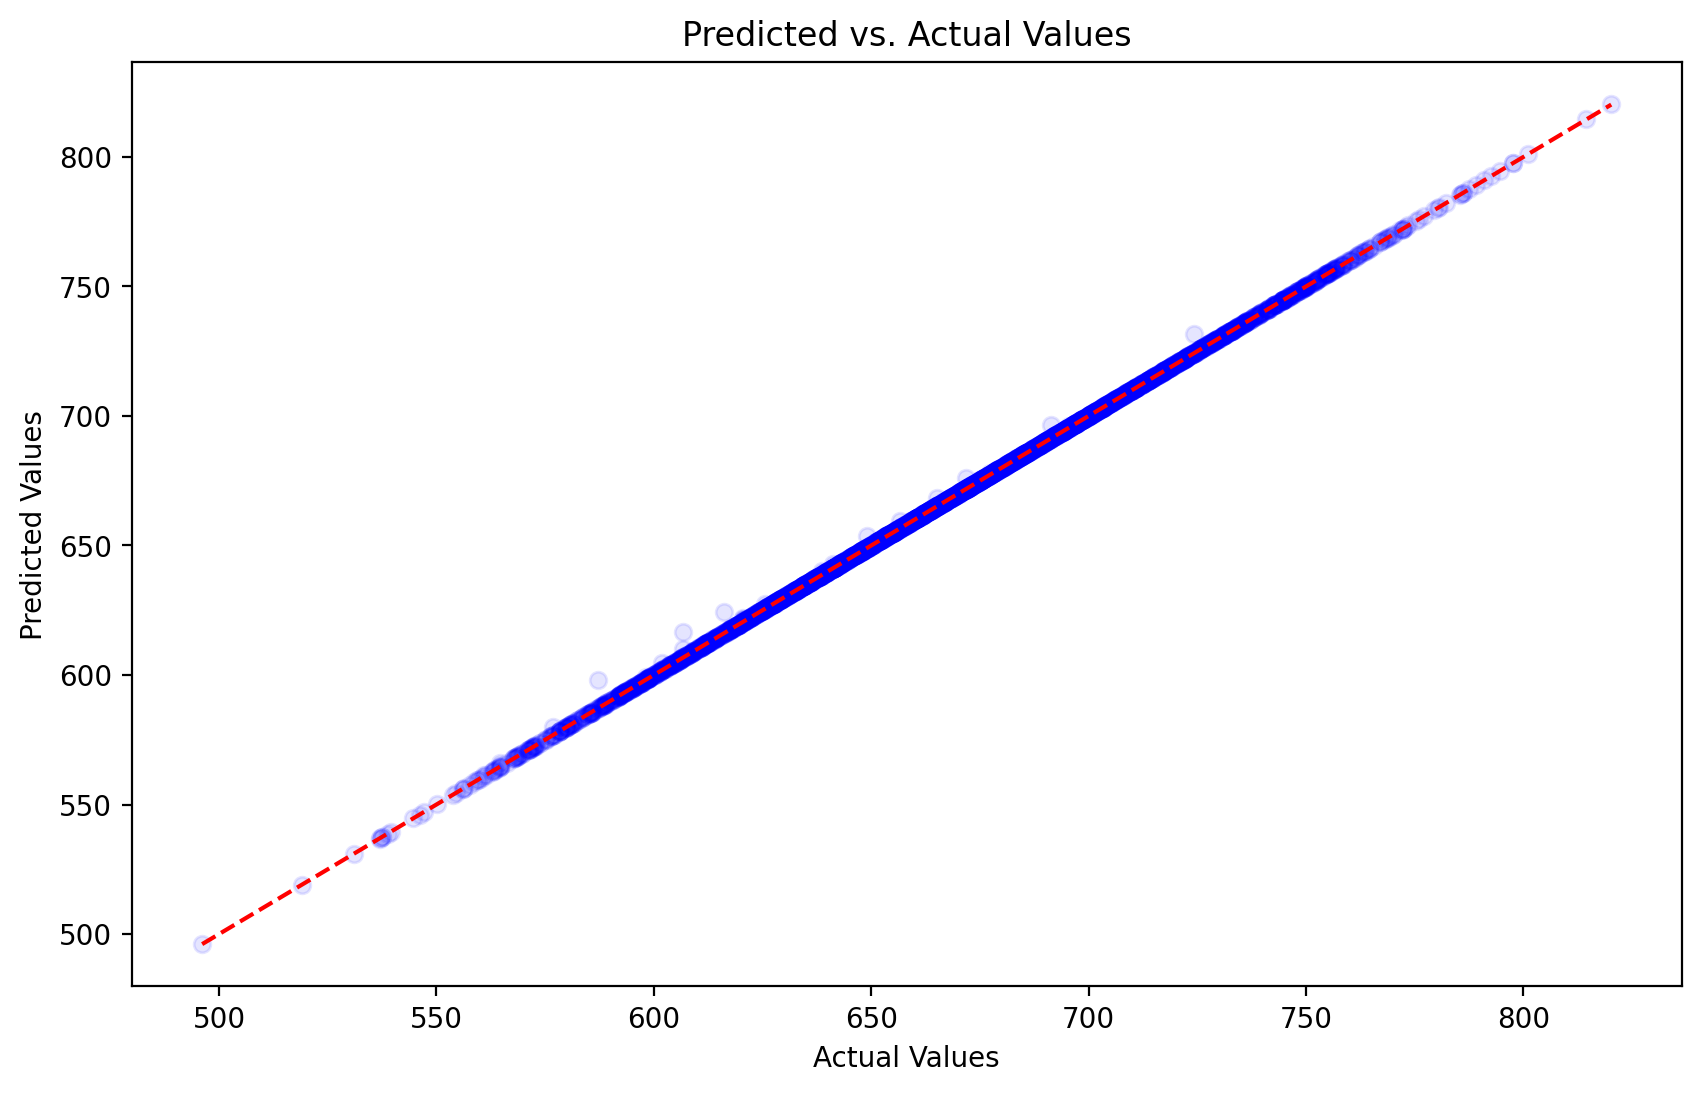

In [22]:
# Creating predictions_4 so we can call it to visualize results
predictions_4 = model.predict(x_test_scaled)

# Setting up a scatter plot. The perfect prediction line represents the ground truth of y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_4, color='blue', alpha=0.1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')

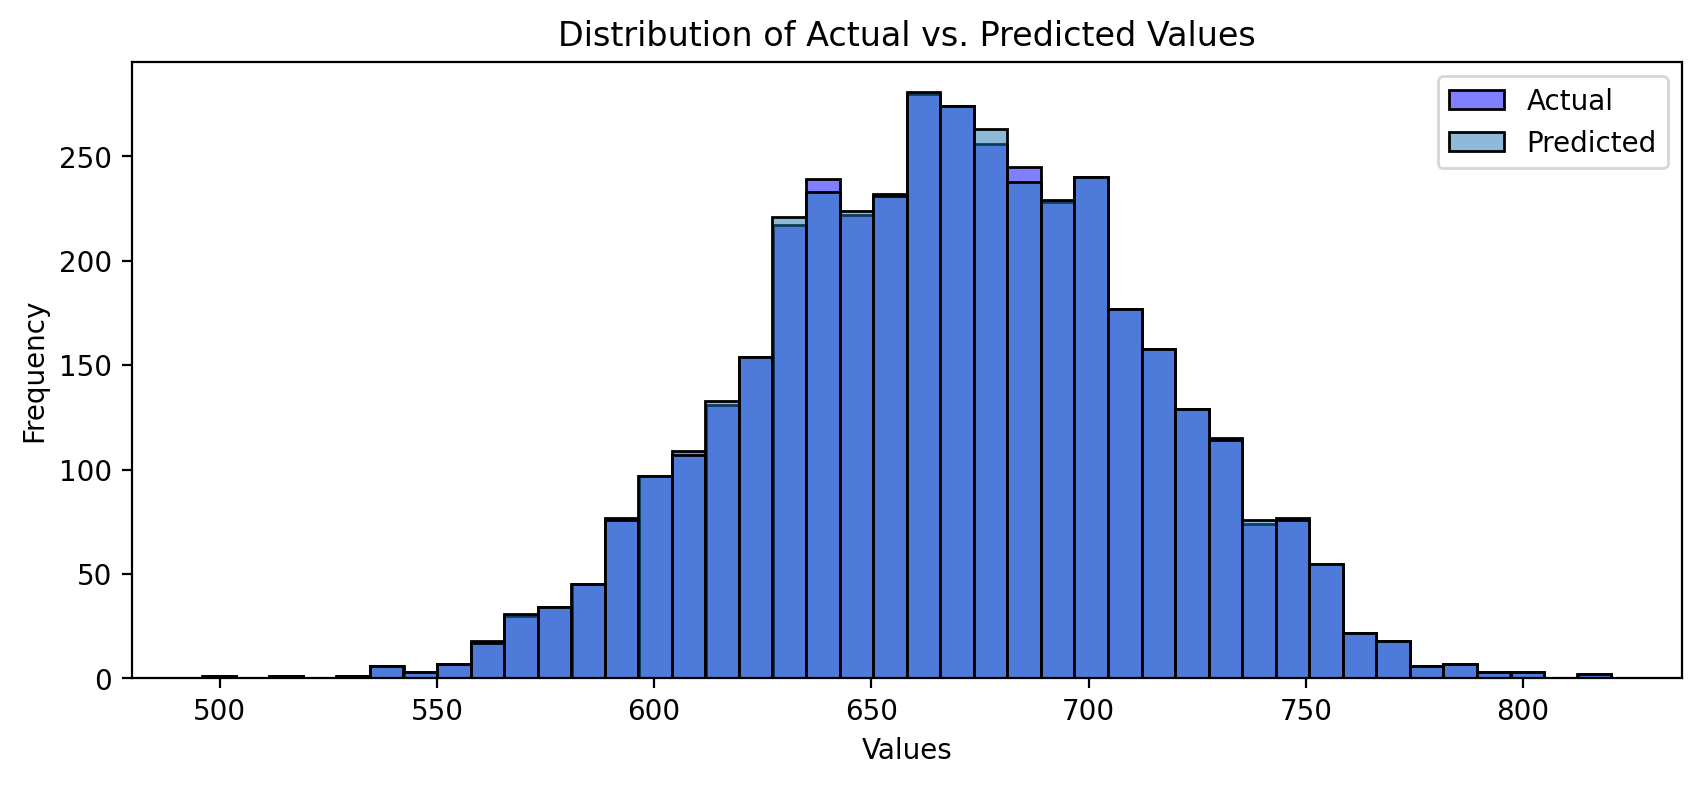

In [23]:
# Also mapping out a histogram, to better visualize actual vs predicted:
plt.figure(figsize=(10, 4))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual')
sns.histplot(predictions_4, color='red', alpha=0.5, label='Predicted',)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Actual vs. Predicted Values')
plt.legend()

That looks really great \- a very, very close fit.
The fact that the predictions stay very close in the final epochs, but still fluctate a little rather than match the exact ground truth leads us to believe that the model has not memorized all the combinations, but rather learned an algorithm nearly identical to the in for the actual calculations.

Plotting out the progression of the MSE scores confirms that we don't see the increase in erroneous predictions for new values that occurs when over\-fitting:



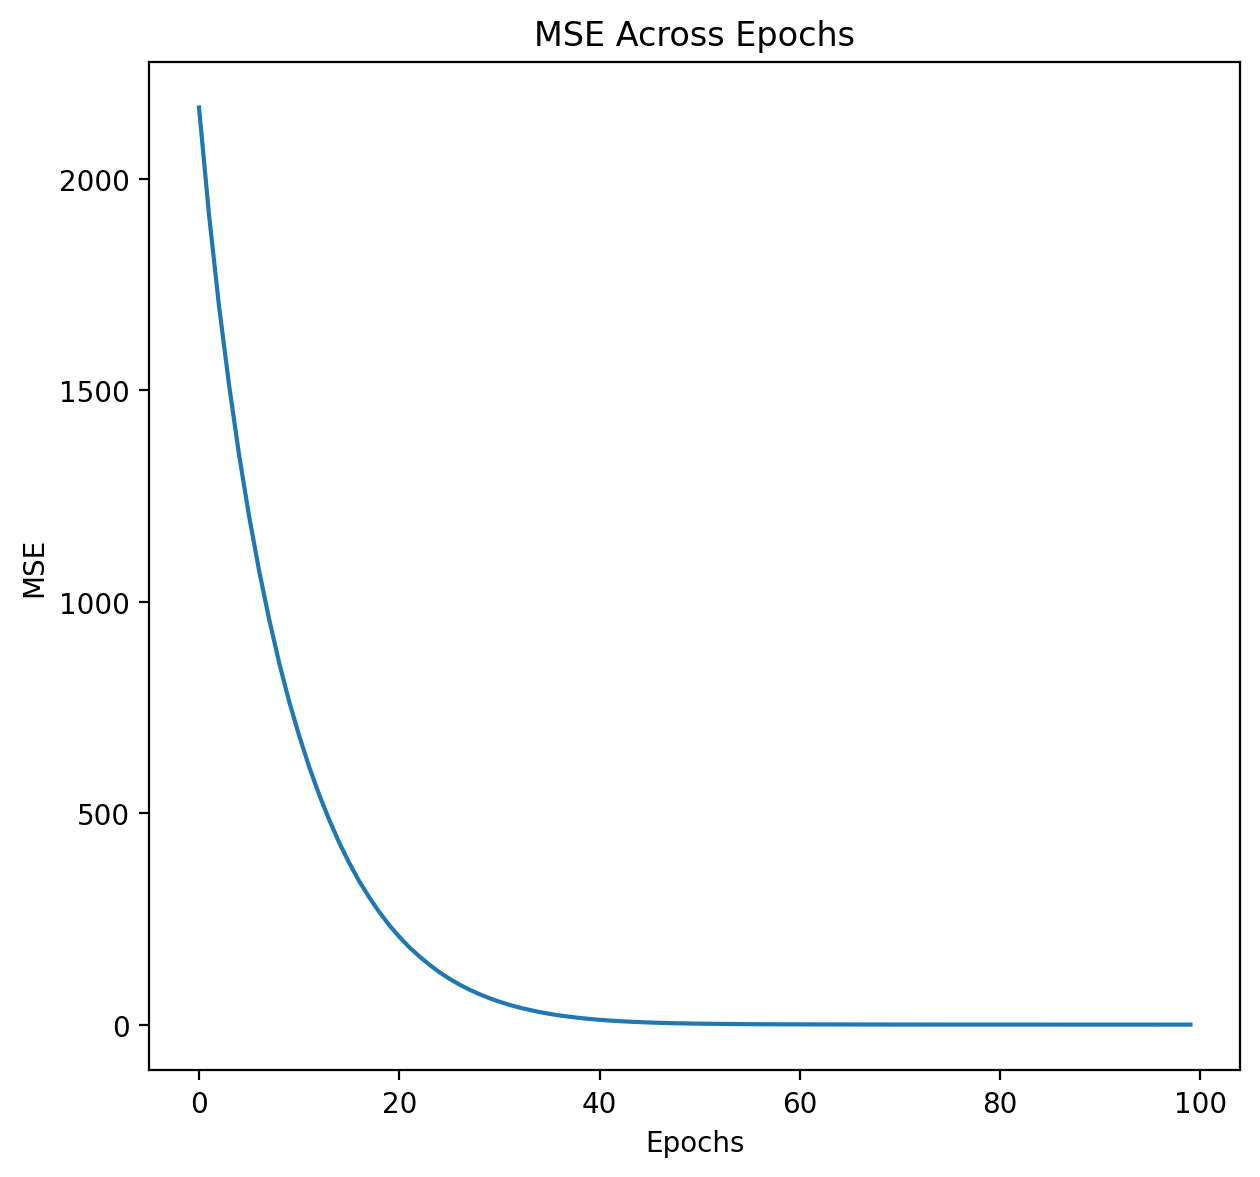

In [24]:
# Accessing the history dictionary
history_dict = history.history

# Plotting this puppy out
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['loss'], label='MSE')
plt.title('MSE Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE')

# Annnnd showing the plot
plt.tight_layout()
plt.show()

We could keep going, but this is close enough for our purposes.

We reached the current state through 120 epochs, and there is a chance we could achieve a better result faster with a different neural network, by increasing the number or width of layers.  That said, the current solution is sufficient for now.

The model has learned how to reliably predict accurate Quality of Life scores for any combination of values entered. 

This concludes the ML portion of our submission.

The following section is a "bonus" of sorts, to put our trained model to use for our end users.


**NOTE: ALL CODE IN THE FOLLOWING SECTION IS SIMPLY A BONUS, PROVIDED SO THAT USERS CAN ACTUALLY PUT OUR TRAINED MODEL TO USE.**

**THIS IS NOT PART OF THE CORE ASSIGNMENT OF TRAINING A MODEL.**


**AS SUCH, MOST OF THE CODE BELOW WAS GENERATED BY CLAUDE 3.7 BETWEEN THE DATES OF 3/30/25 and 4/4/25.**


**THE CODE ITSELF IS NOT MEANT TO BE REVIEWED.**


**THE NEXT\-TO\-LAST CELL PROVIDES INSIGHTS AS TO WHAT FACTORS SEEM THE MOST IMPACTFUL TO OVERALL QUALITY OF LIFE.**

**THE FINAL CELL ENABLES USERS TO ENTER THEIR LIFESTYLE PARAMETERS AND OBTAIN A QUALITY OF LIFE SCORE FROM OUR TRAINED MODEL.** 

**ENJOY!**


In [25]:
# Get the column names from the training data
feature_columns = x_train_scaled.columns 

# Define a function to collect input for each feature from the user
def collect_user_input():
    
    # Set the feature names:
    feature_names = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 
                     'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 
                     'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 
                     'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 
                     'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER']
    # Create the user_data dictionary to stor the user's values.
    user_data = {}
    
    # Print out instructions
    print("\n--- Please enter values for the following features ---")
    print("(Enter a numeric value for each prompt)")
    
    # Provide guidance and collecting input for each feature
    feature_descriptions = {
        'FRUITS_VEGGIES': 'How much fruit and veggies do you include in your diet? (0-5)',
        'DAILY_STRESS': 'How much stress do you experience every day? (0-5)',
        'PLACES_VISITED': 'How many new places did you visit in the last 12 months? (0-10)',
        'CORE_CIRCLE': 'How many people are in your core social circle? (0-10)',
        'SUPPORTING_OTHERS': 'How much time do you spend supporting other people every week? (0-10)',
        'SOCIAL_NETWORK': 'How big is your social network? (0-10)',
        'ACHIEVEMENT': 'How great do you feel about your achievements in life? (0-10)',
        'DONATION': 'How much of your income do you donate to charity? (0-10)',
        'BMI_RANGE': 'What is your BMI range? (1=normal, 2=overweight): ',
        'TODO_COMPLETED': 'How many items do you complete on your daily to-do list? (0-10)',
        'FLOW': 'How much time do you spent in "flow" state weekly? (0-10)',
        'DAILY_STEPS': 'How many daily steps do you take on average? (0-10)',
        'LIVE_VISION': 'How clear is your vision for your life? (0-10)',
        'SLEEP_HOURS': 'How many hours of sleep do you get every night? (0-10)',
        'LOST_VACATION': 'How manys days of vacation did you lose or not use last year? (0-10)',
        'DAILY_SHOUTING': 'How often in your week do you experience shouting incidents? (0-10)',
        'SUFFICIENT_INCOME': 'Does your income meet your needs?(1=No, 2=Yes)',
        'PERSONAL_AWARDS': 'How many personal awards did your receive in the last 12 months? (0-10)',
        'TIME_FOR_PASSION': 'How much time do you spent on passion projects every week? (0-10)',
        'WEEKLY_MEDITATION': 'How much do you spend meditate every week? (0-10)',
        'AGE': 'What is your age? (Less than 20=1, 21 to 35=2, 36 to 50=3, 51 or more =4): ',
        'GENDER': 'What is your gender? (0=female, 1=male): '
    }
    # Loop through features
    for feature in feature_names:
        while True:
            try:
                prompt = feature_descriptions.get(feature, f"{feature}: ")
                value = float(input(prompt))
                
                #store the values in user_data
                user_data[feature] = value
                
                break
            except ValueError:
                print("Please enter a numeric value.")
    
    return user_data, feature_names

In [26]:
# Define the prepare_user_input function to aggregate the user data, feature names, and scaler 
def prepare_user_input(user_data, feature_names, scaler):

    # Create a DataFrame with the same structure as the training data
    user_df = pd.DataFrame([user_data])
    
    # Make sure columns are in the same order as training data
    user_df = user_df[feature_names]
    
    # Scale the features using the same scaler used for training data
    user_scaled = scaler.transform(user_df)
    
    return user_scaled

# Use the model to make predictions based on user input
def predict_for_user_input(model, user_scaled):
    predictions_5 = model.predict(user_scaled)
    return predictions_5[0][0]  

In [27]:
# Analyze how features relate to Quality of Life
def analyze_features(model, X_train, feature_names):
   
    # List to store results
    results = []
    
    # Create a baseline sample (average of all samples)
    baseline = X_train.mean(axis=0).values.reshape(1, -1)
    baseline_pred = model.predict(baseline)[0][0]
    
    # For each feature
    for i, feature in enumerate(feature_names):
        # Create two variations: one for increase, one for decrease
        high_sample = baseline.copy()
        low_sample = baseline.copy()
        
        # Increase/decrease the feature by 1 standard deviation
        std_dev = X_train.iloc[:, i].std()
        high_sample[0, i] += std_dev
        low_sample[0, i] -= std_dev
        
        # Get predictions
        high_pred = model.predict(high_sample)[0][0]
        low_pred = model.predict(low_sample)[0][0]
        
        # Calculate impact:
        impact = high_pred - low_pred
        direction = "Negative" if impact < 0 else "Positive"
        
        # Store results
        results.append({
            'Feature': feature,
            'Impact': impact,
            'Direction': direction,
            'Magnitude': abs(impact)
        })
    
    # Convert to DataFrame and sort
    df = pd.DataFrame(results)
    return df.sort_values('Magnitude', ascending=False)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 15ms/step


1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 16ms/step



All Features Ranked by Impact:
              Feature     Impact Direction  Magnitude
8           BMI_RANGE -16.753540  Negative  16.753540
16  SUFFICIENT_INCOME  15.174255  Positive  15.174255
7            DONATION  12.615540  Positive  12.615540
14      LOST_VACATION -12.551819  Negative  12.551819
2      PLACES_VISITED  11.215820  Positive  11.215820
4   SUPPORTING_OTHERS  11.069580  Positive  11.069580
11        DAILY_STEPS  10.987000  Positive  10.987000
12        LIVE_VISION  10.963562  Positive  10.963562
5      SOCIAL_NETWORK  10.535828  Positive  10.535828
17    PERSONAL_AWARDS  10.508484  Positive  10.508484
19  WEEKLY_MEDITATION  10.257996  Positive  10.257996
0      FRUITS_VEGGIES   9.798889  Positive   9.798889
3         CORE_CIRCLE   9.681519  Positive   9.681519
1        DAILY_STRESS  -9.377197  Negative   9.377197
6         ACHIEVEMENT   9.341064  Positive   9.341064
18   TIME_FOR_PASSION   9.223022  Positive   9.223022
15     DAILY_SHOUTING  -9.124939  Negative   9.124

Text(0.5, 1.0, 'Top Factors that impact your Quality of Life')

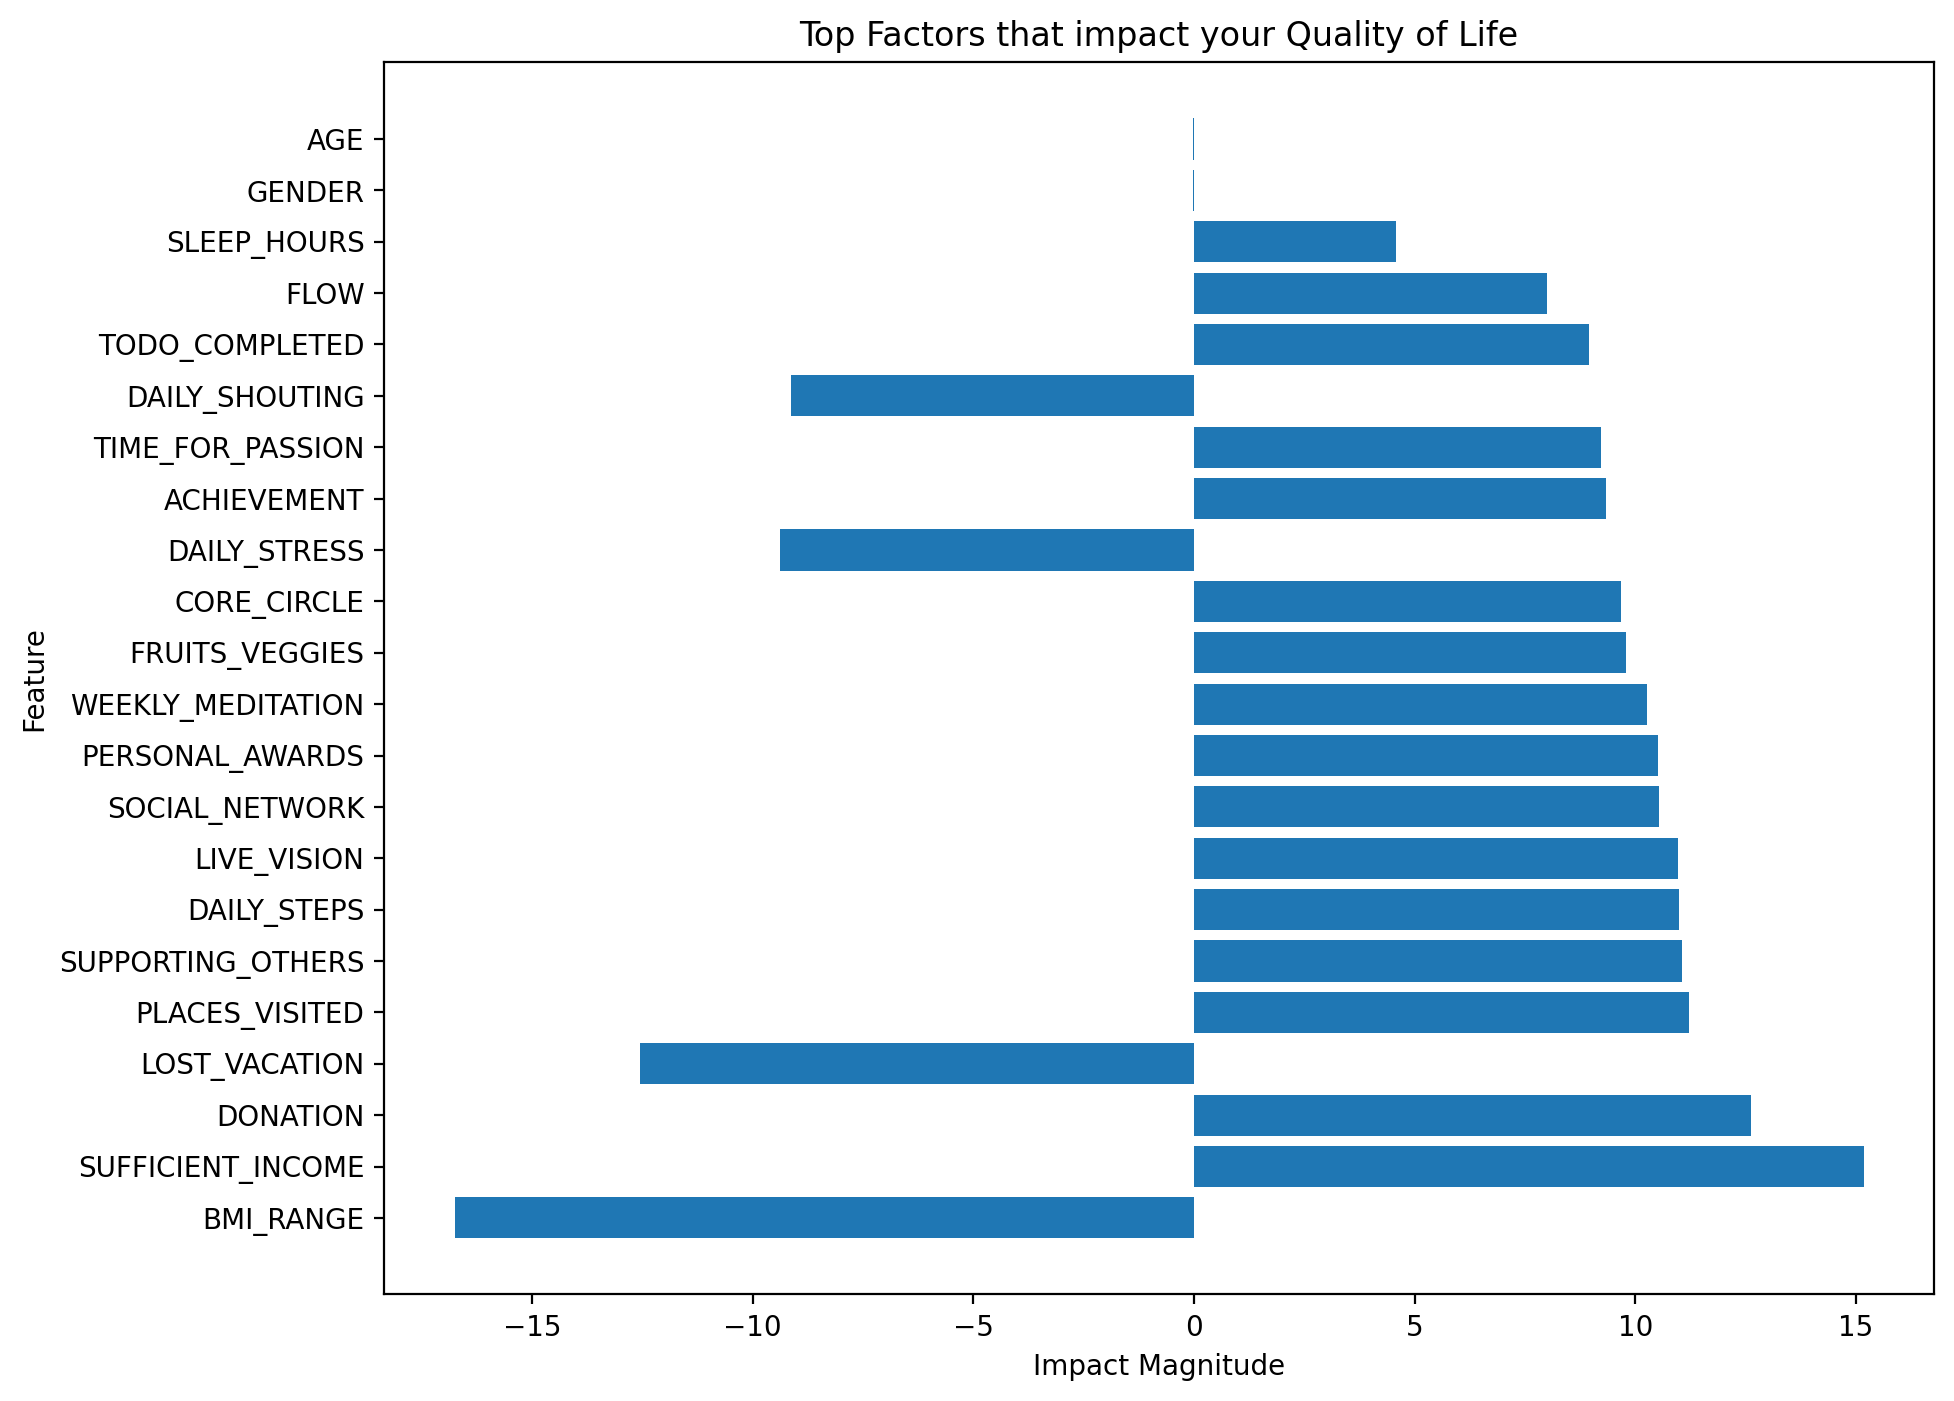

In [28]:
# Run the feature analysis
impact_df = analyze_features(model, x_train_scaled, x_train_scaled.columns)

# Display the features sorted by impact
print("\nAll Features Ranked by Impact:")
print(impact_df[['Feature', 'Impact', 'Direction', 'Magnitude']])

# Plot the features sorted by impact
plt.figure(figsize=(10, 8))
bars = plt.barh(impact_df['Feature'], impact_df['Impact'], )
plt.xlabel('Impact Magnitude')
plt.ylabel('Feature')
plt.title('Top Factors that impact your Quality of Life')

In [29]:
def main():
    # Collect user input
    user_data, feature_names = collect_user_input()

    # Convert to DataFrame and scale
    user_df = pd.DataFrame([user_data])
    user_scaled = scaler.transform(user_df)

    # Make prediction
    prediction = model.predict(user_scaled, verbose=0)
    prediction_value = prediction[0][0] 

    # Display result
    print(f"\n--- Result ---")
    print(f"Predicted Happiness Score: {prediction_value:.0f}")

# Run the main function
if __name__ == "__main__":
    main()


--- Please enter values for the following features ---
(Enter a numeric value for each prompt)


How much fruit and veggies do you include in your diet? (0-5) 5

How much stress do you experience every day? (0-5) 4

How many new places did you visit in the last 12 months? (0-10) 6

How many people are in your core social circle? (0-10) 3

How much time do you spend supporting other people every week? (0-10) 4

How big is your social network? (0-10) 2

How great do you feel about your achievements in life? (0-10) 5

How much of your income do you donate to charity? (0-10) 7

What is your BMI range? (1=normal, 2=overweight):  1

How many items do you complete on your daily to-do list? (0-10) 3

How much time do you spent in "flow" state weekly? (0-10) 4

How many daily steps do you take on average? (0-10) 5

How clear is your vision for your life? (0-10) 7

How many hours of sleep do you get every night? (0-10) 3

How manys days of vacation did you lose or not use last year? (0-10) 6

How often in your week do you experience shouting incidents? (0-10) 2

Does your income meet your needs?(1=No, 2=Yes) 1

How many personal awards did your receive in the last 12 months? (0-10) 8

How much time do you spent on passion projects every week? (0-10) 4

How much do you spend meditate every week? (0-10) 7

What is your age? (Less than 20=1, 21 to 35=2, 36 to 50=3, 51 or more =4):  1

What is your gender? (0=female, 1=male):  0


--- Result ---
Predicted Happiness Score: 663
